# Fake News Analysis with SVM and Logistic Regression

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import string

### Data Preprocessing

In [104]:
true = pd.read_csv('FakeNewsDataset/True.csv')
fake = pd.read_csv('FakeNewsDataset/Fake.csv')

true['prediction'] = 1
fake['prediction'] = 0

In [105]:
true.head()

,title,text,subject,date,prediction
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [106]:
news_collection = []
for row in true.text:
    try:
        news = row.split(" -", maxsplit=1)[1]
        news_collection.append(news)
    except:
        news_collection.append(row)

true['text'] = news_collection
true.head(10)

,title,text,subject,date,prediction
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...",The White House said on Friday it was set to ...,politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...",President Donald Trump said on Thursday he be...,politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,While the Fake News loves to talk about my so...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,"Together, we are MAKING AMERICA GREAT AGAIN! ...",politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,Alabama Secretary of State John Merrill said ...,politicsNews,"December 28, 2017",1


In [107]:
fake.head()

,title,text,subject,date,prediction
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [108]:
data = pd.concat([true,fake])

In [109]:
# Shuffling of the data

In [110]:
data = shuffle(data).reset_index(drop=True)
data

,title,text,subject,date,prediction
0,"Chile's foreign minister: TPP not dead, despit...",Countries involved in the Trans-Pacific Partn...,politicsNews,"November 22, 2016",1
1,CLASSLESS HOLLYWOOD LIB ADDRESSES THOUSANDS AT...,Just another whiny radical leftist keeping it ...,left-news,"May 24, 2015",0
2,Donald Trump Is An Illegitimate President-Ele...,Russian interference in our election should im...,News,"December 10, 2016",0
3,SHOCKER! GRAMMY ATTENDEE Wears “Make America G...,Singer/songwriter Joy Villa decided to follow ...,left-news,"Feb 12, 2017",0
4,"German police arrest Syrian suspect, avert 'ma...",German police arrested a 19-year-old Syrian s...,worldnews,"October 31, 2017",1
...,...,...,...,...,...
44893,Trump supports free press but will call out fa...,U.S. President Donald Trump believes in a fre...,politicsNews,"February 20, 2017",1
44894,LOL! ARROGANT OBAMA BEGS Congress To Save Emba...,Barack Obama implored members of Congress to h...,politics,"May 8, 2017",0
44895,Mexicans' positive view of the U.S. collapses ...,Mexicans positive image of the United States...,worldnews,"September 14, 2017",1
44896,GREAT JOB! WILBUR ROSS Destroys Pro-Paris Acco...,Commerce Secretary Wilbur Ross is one smart ma...,Government News,"Jun 1, 2017",0


In [111]:
data['text'] = data['title'] + ' ' + data['text']
data = data.drop(columns = ['title','subject','date'])

In [112]:
def clean_text(text):

    # Remove punctuation
    translator1 = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(translator1)
    
    # Convert to lowercase characters
    text = text.lower()
         
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in STOPWORDS])
    
    return text

In [113]:
data['text'] = data['text'].apply(clean_text)

data.head()

,text,prediction
0,chile foreign minister tpp dead despite trump ...,1
1,classless hollywood lib addresses thousands co...,0
2,donald trump illegitimate president elect russ...,0
3,shocker grammy attendee wears “make america gr...,0
4,german police arrest syrian suspect avert majo...,1


### Plotting of the prediction column

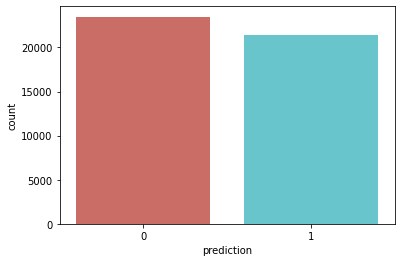

In [114]:
sns.countplot(x='prediction',data=data,palette='hls')

In [115]:
train, test = train_test_split(data, test_size = 0.3, random_state = 7)

### CountVectorization

In [116]:
# fit() : used for generating learning model parameters from training data
# transform() : parameters generated from fit() method,applied upon model to generate transformed data set.

In [117]:
# It takes the top 30000 words
vectorized = CountVectorizer(max_features = 30000)

train_reviews=vectorized.fit_transform(train.text)
test_reviews=vectorized.transform(test.text)

### SVM 

In [118]:
svc = LinearSVC(max_iter = 15000)
svc.fit(train_reviews, train.prediction)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=15000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [119]:
ans = svc.predict(test_reviews)

In [120]:
accuracy_score(ans, test.prediction)

0.9873793615441723

In [121]:
confusion_matrix(test.prediction.tolist(), ans.tolist())

array([[7020,   92],
       [  78, 6280]])

In [122]:
print(classification_report(test.prediction, ans))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7112
           1       0.99      0.99      0.99      6358

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



### Logistic Regression

In [123]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(train_reviews, train.prediction)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
ans_2 = logreg.predict(test_reviews)

In [125]:
accuracy_score(ans_2, test.prediction)

0.9903489235337788

In [126]:
confusion_matrix(test.prediction.tolist(), ans_2.tolist())

array([[7035,   77],
       [  53, 6305]])

In [127]:
print(classification_report(test.prediction, ans_2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7112
           1       0.99      0.99      0.99      6358

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

